In [65]:
import numpy as np
import pandas as pd

df = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls', sheet_name='Data', skiprows=7, skipfooter=1, usecols=['Date', 'P', 'D', 'CPI'])
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y.%m', yearfirst=True)
df.set_index('Date', inplace=True)
df['returns'] = df['P'].pct_change() + df['D'] / df['P'] / 12
df['returns'].fillna(0, inplace=True)
df['inflation'] = df['CPI'].pct_change()
df['inflation'].fillna(0, inplace=True)
df

,P,D,CPI,returns,inflation
Date,,,,,
1871-01-01,4.440000,0.260000,12.464061,0.000000,0.000000
1871-02-01,4.500000,0.260000,12.844641,0.018328,0.030534
1871-03-01,4.610000,0.260000,13.034972,0.029144,0.014818
1871-04-01,4.740000,0.260000,12.559226,0.032771,-0.036498
1871-05-01,4.860000,0.260000,12.273812,0.029775,-0.022726
...,...,...,...,...,...
2020-01-01,3418.701364,58.659615,260.388000,0.017233,0.000415
2020-11-01,3548.992500,58.469231,260.229000,0.039484,-0.000611
2020-12-01,3695.310000,58.278846,260.474000,0.042542,0.000941


<AxesSubplot:xlabel='Date'>

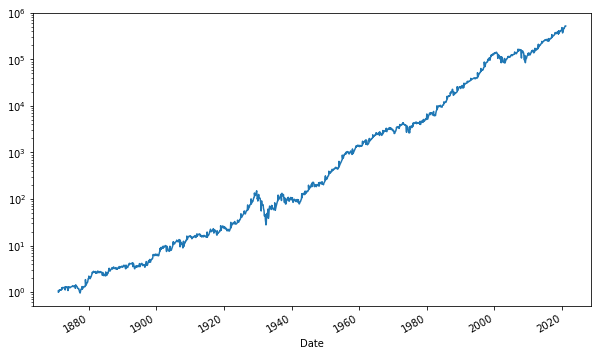

In [66]:
(1 + df['returns']).cumprod().plot(logy=True, figsize=(10, 6))

In [70]:
def sim(starting_capital = 1000000,
        withdrawal = 40000, 
        fees = 0.0015, 
        duration = 30, 
       ):
    """
    Parameters
    ----------
    starting_capital : int
        Starting capital
    withdrawal : int
        Yearly amount to withdraw
    fees : float
        Yearly fees
    duration : int
        Number of years the starting capital should last
        
    Returns
    -------
    float
        The success percentage of the given configuration.
    """
    # turn into monthly values
    withdrawal /= 12
    fees /= 12
    duration *= 12
    
    # loop over each available period
    samples = len(df.index)- duration
    end_capital = np.zeros(samples)

    for n in range(0, samples):
        period = df[n:n+duration]

        cum_inflation = ((1 + period['inflation']).cumprod()).values
        returns = (1 + period['returns']).values
        withdrawals = withdrawal * cum_inflation
        fees_multiplier = 1 - fees

        capital = starting_capital
        for m in range(0, duration):
            capital = capital * returns[m] * fees_multiplier - withdrawals[m]   

        end_capital[n] = capital            

    successful_periods = np.sum(end_capital > 0)
    return successful_periods / samples

print("1M capital, 4% withdrawal rate, no fees, 30 years: {:.2%} success ratio".format(sim(fees=0)))

1M capital, 4% withdrawal rate, no fees, 30 years: 97.85% success ratio
